# Using PYTHON show how the following is achieved

## i. Differentiation

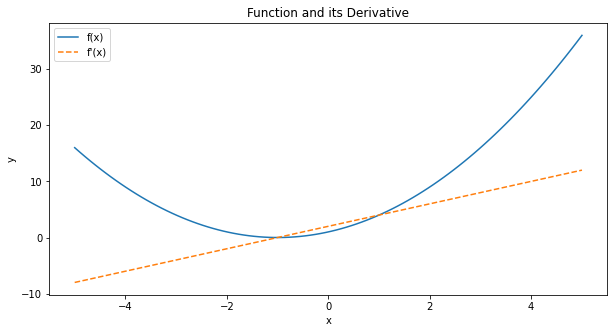

x values: [-5.        -4.8989899 -4.7979798 -4.6969697 -4.5959596]
f(x) values: [16.         15.20212223 14.42465055 13.66758494 12.93092542]
f'(x) values: [-8.         -7.7979798  -7.5959596  -7.39393939 -7.19191919]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

def f(x):
    return x**2 + 2*x + 1

def numerical_derivative(f, x, dx=1e-6):
    return (f(x + dx) - f(x - dx)) / (2 * dx)

x = np.linspace(-5, 5, 100)
y = f(x)
dydx = numerical_derivative(f, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x)')
plt.plot(x, dydx, label="f'(x)", linestyle='--')
plt.legend()
plt.title('Function and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("x values:", x[:5])
print("f(x) values:", y[:5])
print("f'(x) values:", dydx[:5])


## ii. Numerical integration

In [12]:
from scipy.integrate import quad
import numpy as np

# Define the function
def g(x):
    return np.sin(x)

# Compute the integral of g from 0 to π
integral, error = quad(g, 0, np.pi)
print(f"Integral of sin(x) from 0 to π is approximately {integral:.4f}")
print(f"Estimated error in the integral calculation: {error:.2e}")



Integral of sin(x) from 0 to π is approximately 2.0000
Estimated error in the integral calculation: 2.22e-14


## iii. Curve Fitting

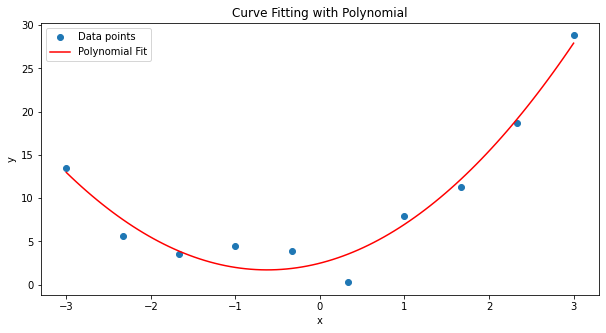

Fitted polynomial coefficients: [ 2.49602536  7.46877583 17.9509606 ]


In [13]:
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt

# Create some data
np.random.seed(0)
x = np.linspace(-3, 3, 10)
y = 2*x**2 + 3*x + 1 + np.random.normal(0, 2, size=x.shape)

# Fit a polynomial of degree 2
p = Polynomial.fit(x, y, 2)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data points')
x_fit = np.linspace(-3, 3, 100)
y_fit = p(x_fit)
plt.plot(x_fit, y_fit, label='Polynomial Fit', color='red')
plt.legend()
plt.title('Curve Fitting with Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print fitted polynomial coefficients
print("Fitted polynomial coefficients:", p.coef)


## iv. Linear Regression

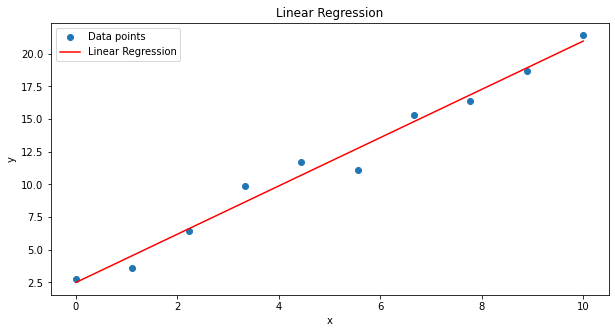

Regression coefficient: 1.85
Intercept: 2.50


In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
x = np.linspace(0, 10, 10).reshape(-1, 1)
y = 2*x.squeeze() + 1 + np.random.normal(0, 1, size=x.shape[0])

# Create and fit the model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred, label='Linear Regression', color='red')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print regression coefficients
print(f"Regression coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")



## v. Spline Interpolation

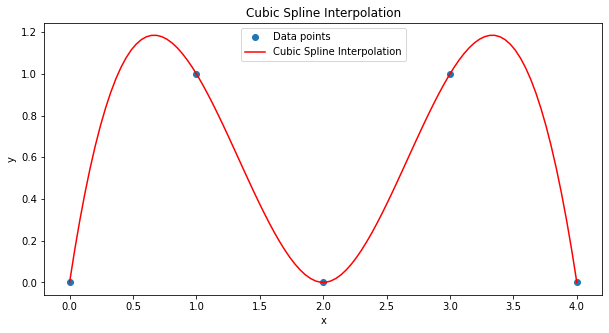

Interpolation values at x=[0, 1, 2, 3, 4]: [0. 1. 0. 1. 0.]


In [16]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

# Define data points
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 0, 1, 0])

# Create the spline interpolation
cs = CubicSpline(x, y)

# Generate points for interpolation
x_interp = np.linspace(0, 4, 100)
y_interp = cs(x_interp)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data points')
plt.plot(x_interp, y_interp, label='Cubic Spline Interpolation', color='red')
plt.legend()
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print some interpolation values
print("Interpolation values at x=[0, 1, 2, 3, 4]:", cs(x))



## If the laser scanner is traversing from x=2.00 to x =4.25 in a linear path, what is the value
## of y at x= 4.0 using the linear spline formula , show how this problem can be solved using
## PYTHON

In [18]:
import numpy as np

# Coordinates of the holes
x_coords = np.array([2.00, 4.25, 5.25, 7.81, 9.20, 10.60])
y_coords = np.array([7.2, 7.1, 6.0, 5.0, 3.5, 5.0])

x_target = 4.0

# Find the interval
for i in range(len(x_coords) - 1):
    if x_coords[i] <= x_target <= x_coords[i + 1]:
        x1, y1 = x_coords[i], y_coords[i]
        x2, y2 = x_coords[i + 1], y_coords[i + 1]
        break

# Linear interpolation
y_target = y1 + (x_target - x1) * (y2 - y1) / (x2 - x1)

print(f"The value of y at x = {x_target} is approximately {y_target:.2f}")


The value of y at x = 4.0 is approximately 7.11



## e.Analyze the frequency components of a signal

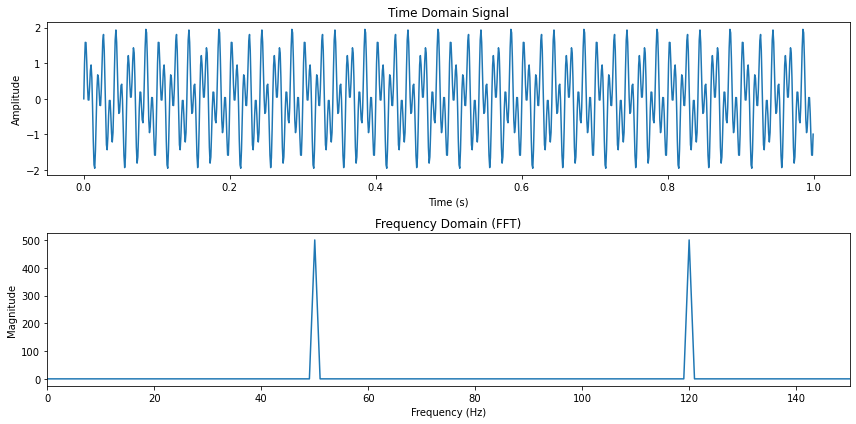

Peak frequency: 120.00 Hz
Peak frequency: 120.00 Hz


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_signal(duration=1, sample_rate=1000):
    # Time array
    t = np.linspace(0, duration, duration * sample_rate, endpoint=False)

    # Signal components
    f1, f2 = 50, 120  
    signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

    # Perform FFT
    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(t), 1/sample_rate)


    plt.figure(figsize=(12, 6))

    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal)
    plt.title('Time Domain Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Frequency domain plot
    plt.subplot(2, 1, 2)
    plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(frequencies)//2])
    plt.title('Frequency Domain (FFT)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 150)  

    plt.tight_layout()
    plt.show()

    return frequencies, fft_result

# the analysis
freqs, fft = analyze_signal()


peak_indices = np.argsort(np.abs(fft))[-2:]  # Get indices of two highest peaks
for idx in peak_indices:
    print(f"Peak frequency: {abs(freqs[idx]):.2f} Hz")


## g) Write a program to show how the trapezoidal rule of integration works in PYTHON


Approximate integral of e^(-x^2) from 0 to 2 with 10 intervals is 0.8818
Intervals (x): [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
Function values (y): [1.         0.96078944 0.85214379 0.69767633 0.52729242 0.36787944
 0.23692776 0.14085842 0.07730474 0.0391639  0.01831564]
Width of each trapezoid (h): 0.2


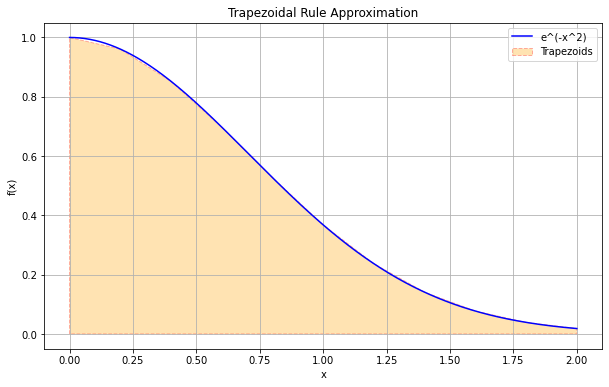

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x**2)

def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral, x, y, h

a = 0
b = 2
n = 10


result, x, y, h = trapezoidal_rule(f, a, b, n)


print(f"Approximate integral of e^(-x^2) from {a} to {b} with {n} intervals is {result:.4f}")

# Detailed output for understanding
print(f"Intervals (x): {x}")
print(f"Function values (y): {y}")
print(f"Width of each trapezoid (h): {h}")

# Dense x values for plotting
x_dense = np.linspace(a, b, 1000)
y_dense = f(x_dense)


plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_dense, label='e^(-x^2)', color='blue')
plt.fill_between(x, y, alpha=0.3, color='orange', edgecolor='red', linestyle='--', label='Trapezoids')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Trapezoidal Rule Approximation')
plt.legend()
plt.grid(True)
plt.show()




## i). Given a set of data points you are to perform polinomial interpolation and approximation.

### i.Implementation : Lagrange polynomial

In [23]:
import numpy as np

def lagrange_interpolation(x, y):
    n = len(x)
    coeffs = np.zeros(n)

    for i in range(n):
        p = np.poly1d([1])
        for j in range(n):
            if i != j:
                p *= np.poly1d([1, -x[j]]) / (x[i] - x[j])
        coeffs += y[i] * p.coeffs

    return np.poly1d(coeffs[::-1])

# Given data points
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

lagrange_poly = lagrange_interpolation(x, y)
print("Lagrange Polynomial Coefficients:", lagrange_poly.coeffs)

Lagrange Polynomial Coefficients: [-3.55271368e-15  1.00000000e+00 -4.44089210e-16]



### ii.Implementation : Newton's divided difference method


In [24]:
def newton_divided_difference(x, y):
    n = len(x)
    coeffs = np.zeros(n)

    # Initialize the divided difference table
    dd = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        dd[i][0] = y[i]

    # Calculate the divided differences
    for j in range(1, n):
        for i in range(n - j):
            dd[i][j] = (dd[i+1][j-1] - dd[i][j-1]) / (x[i+j] - x[i])

    # Extract the coefficients
    for i in range(n):
        coeffs[i] = dd[0][i]

    # Convert to polynomial form
    poly = np.poly1d([1])
    result = np.poly1d([coeffs[0]])
    for i in range(1, n):
        poly *= np.poly1d([1, -x[i-1]])
        result += coeffs[i] * poly

    return result

# Using the same data points
newton_poly = newton_divided_difference(x, y)
print("Newton's Polynomial Coefficients:", newton_poly.coeffs)

Newton's Polynomial Coefficients: [1. 0. 0.]



## j. Find the eigenvalues and eigenvectors of the given matrix

### i.Implementation : Power iteration method


In [25]:
import numpy as np

def power_iteration(A, num_iterations=1000, tolerance=1e-8):
    n = A.shape[0]
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)

    for _ in range(num_iterations):
        Av = A.dot(v)
        eigenvalue = v.dot(Av)
        v_new = Av / np.linalg.norm(Av)

        if np.allclose(v, v_new, rtol=tolerance):
            break

        v = v_new

    return eigenvalue, v

A = np.array([[4, 1, 1],
              [1, 3, -1],
              [1, -1, 2]])

eigenvalue, eigenvector = power_iteration(A)
print("Power Iteration Method:")
print("Dominant eigenvalue:", eigenvalue)
print("Corresponding eigenvector:", eigenvector)

Power Iteration Method:
Dominant eigenvalue: 4.675130870566642
Corresponding eigenvector: [0.88765035 0.42713224 0.1721479 ]



### ii.Implementation : QR Algorithm


In [26]:
def qr_algorithm(A, num_iterations=1000):
    n = A.shape[0]
    Q = np.eye(n)

    for _ in range(num_iterations):
        Q_k, R_k = np.linalg.qr(A)
        A = R_k.dot(Q_k)
        Q = Q.dot(Q_k)

    eigenvalues = np.diag(A)
    eigenvectors = Q

    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = qr_algorithm(A)
print("\nQR Algorithm:")
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")


QR Algorithm:
Eigenvalues: [4.67513087 3.53918887 0.78568026]
Eigenvectors:
